<table style="width: 100%">
    <tr style="background: #ffffff">
        <td style="padding-top:25px;width: 180px"><img src="https://mci.edu/templates/mci/images/logo.svg" alt="Logo"></td>
        <td style="width: 100%">
            <div style="text-align:right; width: 100%; text-align:right"><font style="font-size:38px"><b>Visualisierung und Datenbanken</b></font></div>
            <div style="padding-top:0px; width: 100%; text-align:right"><font size="4"><b>WS 2022</b></font></div>
        </td>
    </tr>
</table>

---

# 3 Creating Plots



Seaborn is a library for making statistical graphics in Python. It builds on top of matplotlib and integrates closely with pandas data structures.

Seaborn helps You explore and understand your data. Its plotting functions operate on dataframes and arrays containing whole datasets and internally perform the necessary semantic mapping and statistical aggregation to produce informative plots. Its dataset-oriented, declarative API lets You focus on what the different elements of your plots mean, rather than on the details of how to draw them. [here](https://seaborn.pydata.org/introduction.html)

We start with a famous example data set called tips. It shows the tips collected at different tables given the total bill, the gender of the person who paid the bill, whether he/she smoked, the number of guests at the table and the data (time, weekday).

In [1]:
# Import seaborn
import seaborn as sns
tips = sns.load_dataset("tips")
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


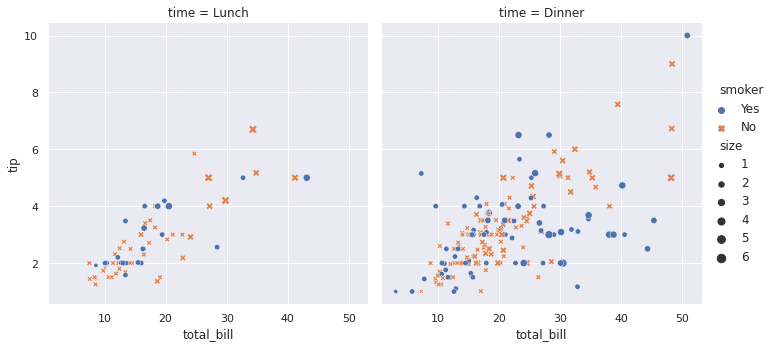

In [ ]:
# Apply the default theme
sns.set_theme()

# Load an example dataset
tips = sns.load_dataset("tips")


# Create a visualization
sns.relplot(
    data=tips,
    x="total_bill", y="tip", col="time",
    hue="smoker", style="smoker", size="size",
)

A few things have happened here. Let’s go through them one by one:

```
# Import seaborn
import seaborn as sns
```

Seaborn is the only library we need to import for this simple example. By convention, it is imported with the shorthand sns.

Behind the scenes, seaborn uses matplotlib to draw its plots. For interactive work, it’s recommended to use a Jupyter/IPython interface in matplotlib mode, or else you’ll have to call matplotlib.pyplot.show() when you want to see the plot.

```
# Apply the default theme
sns.set_theme()
```

This uses the matplotlib rcParam system and will affect how all matplotlib plots look, even if you don’t make them with seaborn. Beyond the default theme, there are several other options, and you can independently control the style and scaling of the plot to quickly translate your work between presentation contexts (e.g., making a version of your figure that will have readable fonts when projected during a talk). If you like the matplotlib defaults or prefer a different theme, you can skip this step and still use the seaborn plotting functions.

```
# Load an example dataset
tips = sns.load_dataset("tips")
```

Most code in the docs will use the load_dataset() function to get quick access to an example dataset. There’s nothing special about these datasets: they are just pandas dataframes, and we could have loaded them with pandas.read_csv() or built them by hand. Most of the examples in the documentation will specify data using pandas dataframes, but seaborn is very flexible about the data structures that it accepts.

```
# Create a visualization
sns.relplot(
    data=tips,
    x="total_bill", y="tip", col="time",
    hue="smoker", style="smoker", size="size",
)
```

This plot shows the relationship between five variables in the tips dataset using a single call to the seaborn function ```relplot()```. Notice how we provided only the names of the variables and their roles in the plot. Unlike when using matplotlib directly, it wasn’t necessary to specify attributes of the plot elements in terms of the color values or marker codes. Behind the scenes, seaborn handled the translation from values in the dataframe to arguments that matplotlib understands. This declarative approach lets you stay focused on the questions that you want to answer, rather than on the details of how to control matplotlib.



## Changing the Visualization Type

Seaborn offers a lot of different [plots](https://seaborn.pydata.org/examples/index.html). Each plot type has it's own function with different parameters.

However, the parameters are often similar throught searborn. You find all plot types and their documentation [here](https://seaborn.pydata.org/api.html).

With most plots like ```relplot```and ```scatterplot``` the minimal parameters are:
- ```data``` ... a data tidy frame where the data comes from
- ```x``` ... data for the x-Axis
- ```y``` ... data for the x-Axis

Also common is the parameter ```hue``` which is a form of group by.

For instance, a ```scatterplot()``` is very similiar to a ```relplot```.

✍️ **Task** 

Look in the documentation and find the difference between them by creating a `relplot()`.


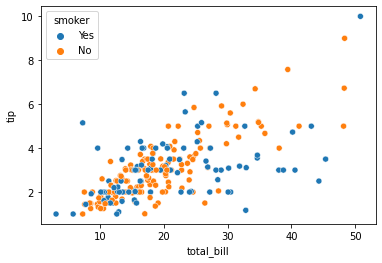

In [2]:
# Import seaborn
import seaborn as sns

# Load an example dataset
tips = sns.load_dataset("tips")


# Create a visualization
sns.scatterplot(
    data=tips,
    x="total_bill", y="tip",
    hue="smoker")


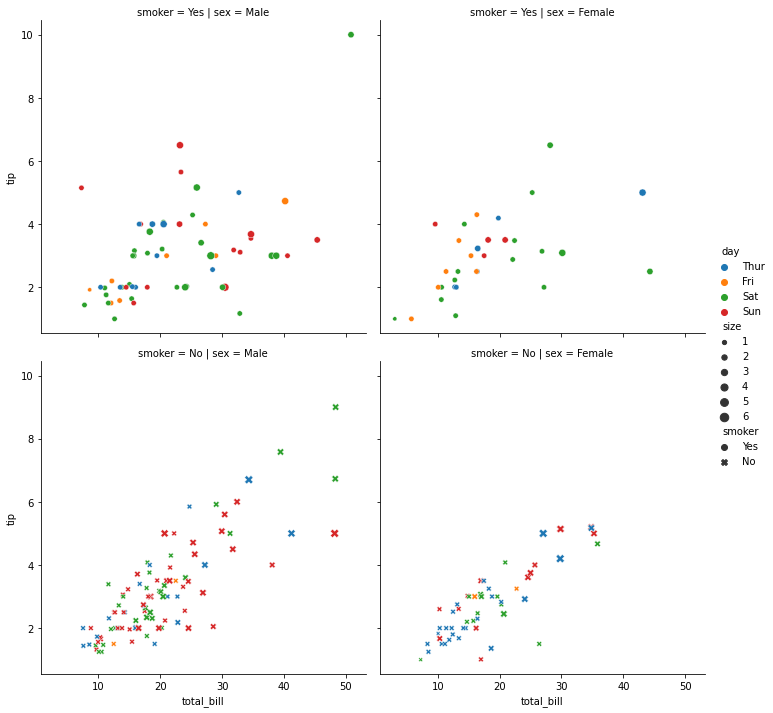

In [3]:
# A rel plot is a collection of multiple scatterplots grouped by vategorial variables
# creating rows and colomns using the col and row parameter
sns.relplot(
    data=tips,
    x="total_bill", y="tip",
    hue="day", style="smoker", size="size",
    col="sex", row="smoker"
)

✍️ **Task**

Create a [bar plot](https://seaborn.pydata.org/generated/seaborn.barplot.html) that compares the average tip of male and female guest on all days of the week.

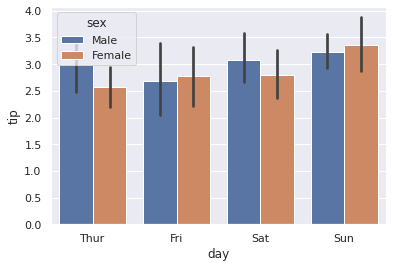

In [ ]:
# Import seaborn
import seaborn as sns

# Load an example dataset
tips = sns.load_dataset("tips")


# Create a visualization
sns.barplot(x="day", y="tip", hue="sex", data=tips)


## Themes

Basic styling of plots can be set with the ```set_theme()``` function.

This function lets You change the font, font scale, color codings and many other things.

It also includes two other functions [```set_style```](https://seaborn.pydata.org/generated/seaborn.set_style.html) and [```set_context()```](https://seaborn.pydata.org/generated/seaborn.set_context.html)

✍️ **Task**

Change the plot above to increase the font size and select a style with a white background.

[See documentation](https://seaborn.pydata.org/generated/seaborn.set_theme.html)


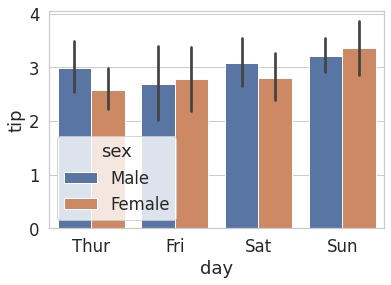

In [ ]:
# Import seaborn
import seaborn as sns

sns.set_theme(style="whitegrid", font_scale = 1.5)

# Load an example dataset
tips = sns.load_dataset("tips")


# Create a visualization
fig1 = sns.barplot(x="day", y="tip", hue="sex", data=tips)

## Context

You might want to use the same plot for different things (e.g., putting it on a paper or poster).

The context lets You control the scaling of plot elements like the size of the labels, lines, and other elements of the plot, without changeing the overall style. 

The base context is ```notebook```, and the other contexts are ```paper```, ```talk```, and ```poster```.

*Hint:*
You might find, that Your figure is overwritten in each passing of the loop so You do not get four different figures. To do so, you must create a new figure in every passing of the loop using ```plt.figure()```. This is like adding a new blank canvas.
You must import matplotlib first, as creating a new blank figure is a matplotlib function.

```
import matplotlib
import matplotlib.pyplot as plt

for ... :
  plt.figure()
  
  fig1 = sns.barplot()


```

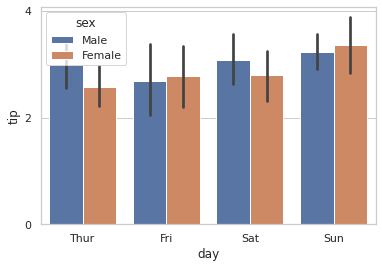

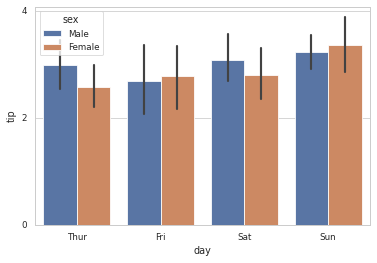

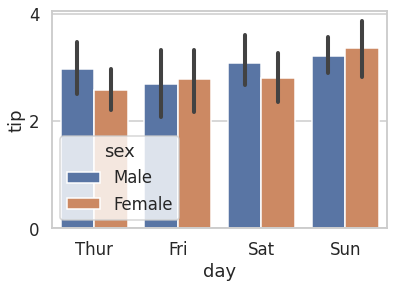

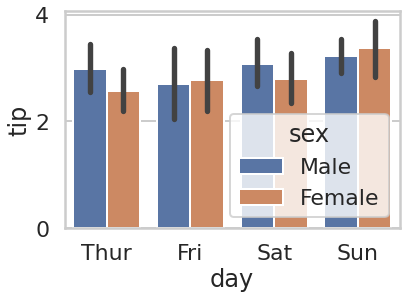

In [ ]:
# Import seaborn
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

# Load an example dataset
tips = sns.load_dataset("tips")

sns.set_theme(style="whitegrid", font_scale = 1.5)

for context in ["notebook","paper","talk","poster"]:

  sns.set_context(context)
  plt.figure()
  # Create a visualization
  fig1 = sns.barplot(x="day", y="tip", hue="sex", data=tips)


## Style

In contrast to the context, ```set_style()```changes everythinng but the scaling. 

This allows You to change the style independtly from everything else:

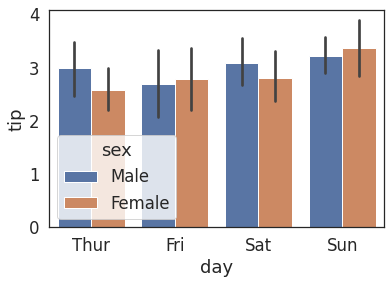

In [ ]:
# Import seaborn
import seaborn as sns

sns.set_theme(font_scale = 1.5)
sns.set_style(style="white")


# Load an example dataset
tips = sns.load_dataset("tips")


# Create a visualization
fig1 = sns.barplot(x="day", y="tip", hue="sex", data=tips)

# 🏁 Recap

- If you have finished the tasks and have no questions, place the green card on top.
- If you have finished the tasks but would like to discuss the solutions together again, place the yellow card on top.

![](https://www.lokalinfo.ch/fileadmin/news_import/image003_03.jpg)

## Working with colors

There are two ways to work with colors. Color palettes and manually defining the colors of the plot.

### Color palettes

Are prepared sequecnes of colors, that provide You with a distinctive style.

You can plot the current [color palette](https://seaborn.pydata.org/tutorial/color_palettes.html) using:



In [ ]:
sns.color_palette()

[(0.275191, 0.194905, 0.496005),
 (0.212395, 0.359683, 0.55171),
 (0.153364, 0.497, 0.557724),
 (0.122312, 0.633153, 0.530398),
 (0.288921, 0.758394, 0.428426),
 (0.626579, 0.854645, 0.223353)]

To change the color palette globally You can use the ```set_palette()``` function.

In [ ]:
sns.set_palette("rocket")
sns.color_palette()

[(0.20973515, 0.09747934, 0.24238489),
 (0.43860848, 0.12177004, 0.34119475),
 (0.67824099, 0.09192342, 0.3504148),
 (0.8833417, 0.19830556, 0.26014181),
 (0.95381595, 0.46373781, 0.31769923),
 (0.96516917, 0.70776351, 0.5606593)]

Note, that by default, the color palette is overwritten by using ```set_theme()```

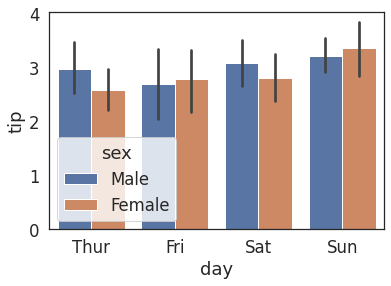

In [ ]:
# Import seaborn
import seaborn as sns

sns.set_theme(font_scale = 1.5)
sns.set_style(style="white")


# Load an example dataset
tips = sns.load_dataset("tips")


# Create a visualization
fig1 = sns.barplot(x="day", y="tip", hue="sex", data=tips)

However, You can pass the palette to to theme or set if after charging the theme:

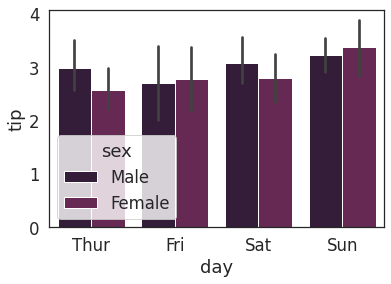

In [ ]:
# Import seaborn
import seaborn as sns

sns.set_theme(font_scale = 1.5, palette = sns.color_palette("rocket"))
sns.set_style(style="white")


# Load an example dataset
tips = sns.load_dataset("tips")


# Create a visualization
fig1 = sns.barplot(x="day", y="tip", hue="sex", data=tips)

### Creating Color plattes

As You can see color platette creates a suboptimal result, as the two purple bars look very similar. This is because, seaborn just takes the first two colors of the palette to create two bars.

One simple, way to adress this problem is to create a new color palette with fewer colors, so that the distance between the colors becomes larger.

In [ ]:
sns.set_palette("rocket",3)
sns.color_palette()

[(0.38092887, 0.12061482, 0.32506528),
 (0.7965014, 0.10506637, 0.31063031),
 (0.95922872, 0.53307513, 0.3748895)]

✍️ **Task**

Adjust the number of colors in a palette of your liking to create a better plot.

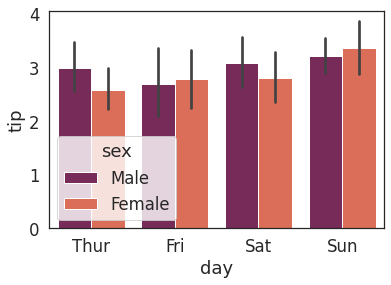

In [4]:
# Import seaborn
import seaborn as sns

sns.set_theme(font_scale = 1.5, palette = sns.color_palette("rocket",2))
sns.set_style(style="white")


# Load an example dataset
tips = sns.load_dataset("tips")


# Create a visualization
fig1 = sns.barplot(x="day", y="tip", hue="sex", data=tips)

You can also create Your own color palettes. To do so, You can make a list of RGB-Values for each color in the palette. The RGB-Values themself are also a list of the Red, Blue, Green values marked as a float between 0 and 1.0.

Usually, RGB-values are given as integer values between 0 and 255 (8-Bit). Hence, You have to divide the values by 255 before You pass it to the ```color_palette()``` function.

For instance, this create a palette with two MCI colors:

In [ ]:
my_palette_with_RGB=[[230/255,128/255,41/255], [0,65/255,110/255]]


sns.color_palette(my_palette_with_RGB)


[(0.9019607843137255, 0.5019607843137255, 0.1607843137254902),
 (0.0, 0.2549019607843137, 0.43137254901960786)]

✍️ **Task**

Create Your own color palette with seven colors an use it to make two plots that answers the following Question:
* Is there a difference in the *relative size* of tips given on different days of the week?

*Hints*
- Does Your color palette address a sensible grouping of the days?
- What is the *relative size* of the tip? Besides calculating this value before printing (Plot 1). Is there a way to show this directly in a graph (Plot 2)?
- Style Your graph.


Here, is some inspiration.
- [Selection of Color Palettes](https://colorhunt.co/palette/f0ebe3e4dccf7d9d9c576f72)
- [Create a color palette based on an image](https://www.canva.com/colors/color-palette-generator/)
-[More technical Approach](https://paletton.com/#uid=b5p33270kllllaFw0g0qFqFg0w0aF)


In [ ]:
tips = sns.load_dataset("tips")
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [ ]:
my_palette_with_RGB=[[210/255,108/255,21/255],[230/255,128/255,41/255], [0,45/245,100/255], [0,65/255,110/255]]
sns.color_palette(my_palette_with_RGB)

[(0.8235294117647058, 0.4235294117647059, 0.08235294117647059),
 (0.9019607843137255, 0.5019607843137255, 0.1607843137254902),
 (0.0, 0.1836734693877551, 0.39215686274509803),
 (0.0, 0.2549019607843137, 0.43137254901960786)]

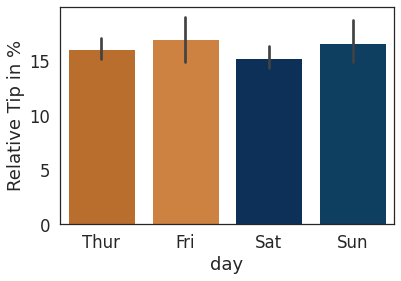

In [ ]:
# Import seaborn
import seaborn as sns

# Load an example dataset
tips = sns.load_dataset("tips")

tips["Relative Tip in %"] = tips["tip"] / tips["total_bill"] * 100


sns.set_theme(style="white", font_scale = 1.5, palette = sns.color_palette(my_palette_with_RGB))


# Create a visualization
fig1 = sns.barplot(x="day", y="Relative Tip in %", data=tips)


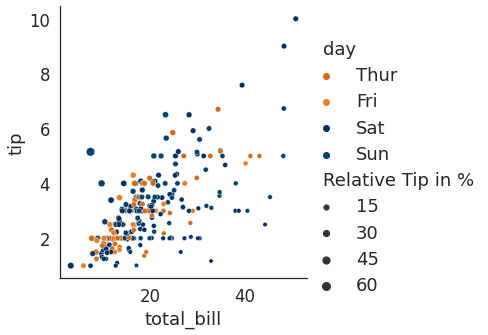

In [ ]:
# Import seaborn
import seaborn as sns

# Load an example dataset
sns.set_theme(style="white", font_scale = 1.5, palette = sns.color_palette(my_palette_with_RGB))


# Create a visualization
fig1 = sns.relplot(x="total_bill", y="tip", hue="day", size = "Relative Tip in %", data=tips)

You might have noted, that the colors in the plot are not exactly the colors, we defined in the palette.

Unforunatly, by default seaborn lowers the saturation of colors. The can change this, by tweaking the ```saturation``` parameter of the plot.


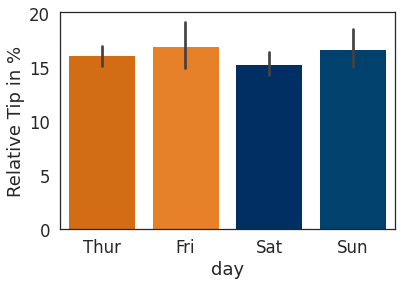

In [ ]:
from seaborn.utils import saturate
# Import seaborn
import seaborn as sns


# Load an example dataset
tips = sns.load_dataset("tips")

tips["Relative Tip in %"] = tips["tip"] / tips["total_bill"] * 100


sns.set_theme(style="white", font_scale = 1.5, palette = sns.color_palette(my_palette_with_RGB))


# Create a visualization
fig1 = sns.barplot(x="day", y="Relative Tip in %", data=tips,saturation=1)


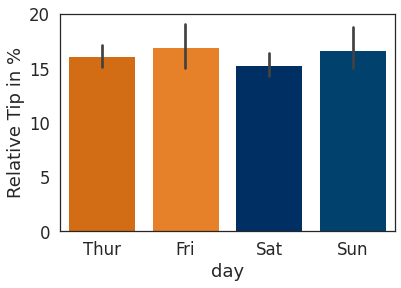

In [ ]:
# Load an example dataset
tips = sns.load_dataset("tips")

tips["Relative Tip in %"] = tips["tip"] / tips["total_bill"] * 100

# Create a visualization
fig1 = sns.barplot(x="day", y="Relative Tip in %", data=tips,saturation=1)

### 🤓 Color palette dicts

No we remove the Thursdays from the data from the data set.
For consistency, it would be nice if the weekends remain blue, while the other days of the week remain orange.

However, as our color palette is just a list, seaborns tarts coloring at the frist day in the data, which is a Friday now.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


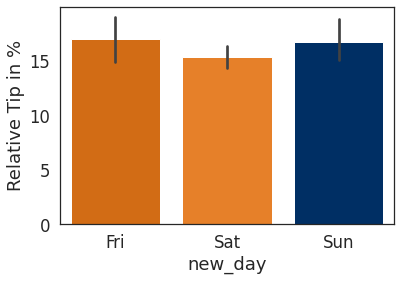

In [ ]:
tips_no_thur = tips[tips["day"]!="Thur"]

tips_no_thur["new_day"] = tips_no_thur["day"].cat.remove_unused_categories()

tips_no_thur["new_day"].unique()


# Load an example dataset
tips = sns.load_dataset("tips")

tips["Relative Tip in %"] = tips["tip"] / tips["total_bill"] * 100

# Create a visualization
fig1 = sns.barplot(x="new_day", y="Relative Tip in %", data=tips_no_thur,saturation=1)

To keep colors consitens, we can define dictionary palettes isnteal of simple lists. The following example, create a palette, that highlights all fridays. In this way the coloring in independet of the order the categories occur.

In [ ]:
palette_dict = {x: 'gray' for x in tips["day"].unique()}
palette_dict

{'Fri': 'gray', 'Sat': 'gray', 'Sun': 'gray', 'Thur': 'gray'}

In [ ]:
palette_dict["Fri"] = [230/255,128/255,41/255]
palette_dict

{'Fri': [0.9019607843137255, 0.5019607843137255, 0.1607843137254902],
 'Sat': 'gray',
 'Sun': 'gray',
 'Thur': 'gray'}

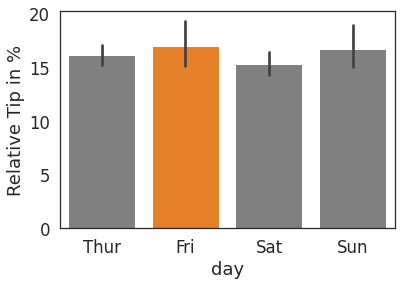

In [ ]:
sns.set_theme(style="white", font_scale = 1.5)

tips["Relative Tip in %"] = tips["tip"] / tips["total_bill"] * 100

# Create a visualization
fig1 = sns.barplot(x="day", y="Relative Tip in %",palette = palette_dict, data=tips, saturation = 1)

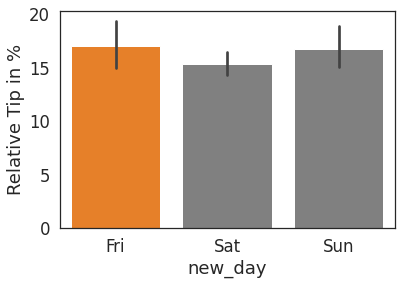

In [ ]:
# Create a visualization
fig1 = sns.barplot(x="new_day", y="Relative Tip in %", palette = palette_dict, data=tips_no_thur,saturation=1)

# 🏁 Recap

- If you have finished the tasks and have no questions, place the green card on top.
- If you have finished the tasks but would like to discuss the solutions together again, place the yellow card on top.

![](https://www.lokalinfo.ch/fileadmin/news_import/image003_03.jpg)

## Tweaking other aspects of the plot

Not all properties can be changed with seaborn. For more advances changes, You'll have to fall back to matplotlib, which is the package that really created the seaborn plots.

First, let's find out, what a Figure really is.


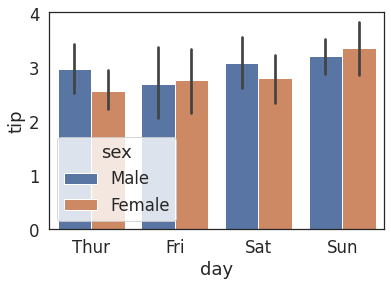

In [ ]:
# Import seaborn
import seaborn as sns
import matplotlib. pyplot as plt
sns.set_theme(font_scale = 1.5)
sns.set_style(style="white")


# Load an example dataset
tips = sns.load_dataset("tips")


# Create a visualization
fig1 = sns.barplot(x="day", y="tip", hue="sex", data=tips)

plt.show(fig1)


In [ ]:
print(type(fig1))

<class 'matplotlib.axes._subplots.AxesSubplot'>


This figure is a an ```AxesSubplot``` that holds an [matplotlib.axes](https://matplotlib.org/stable/api/axes_api.html) object, that contains most of the figure elements: Axis, Tick, Line2D, Text, Polygon, etc., and sets the coordinate system.

Using the [axes](https://matplotlib.org/stable/api/axes_api.html) interface, we can change pretty much everything of the plot. For instance, we can change the label on the x-Axis using:

```
fig1.set_xlabel('Day of the Week')
```

Hereafter, we have to call the ```plot()``` function to apply the changes:

```
plt.show(fig1)
```

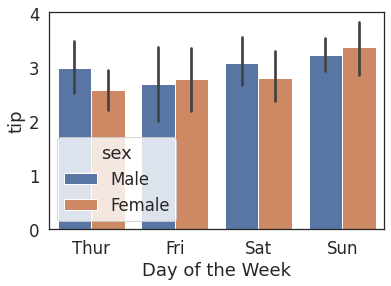

In [ ]:

# Import seaborn
import seaborn as sns
import matplotlib. pyplot as plt
sns.set_theme(font_scale = 1.5)
sns.set_style(style="white")


# Load an example dataset
tips = sns.load_dataset("tips")


# Create a visualization
fig1 = sns.barplot(x="day", y="tip", hue="sex", data=tips)

# Using the set_xlabel to change
fig1.set_xlabel('Day of the Week')


plt.show(fig1)


✍️ **Task**

Use the Axis-Api to make the following changes:

- Make the y-Axis go only from 2.5 to 3.5 (```set_ylim()```)
- Add ticks at a distance of 0,5 (```set_yticks()```)
- Make the figure the same height and width (```set_aspect()```)
- Put the legend outside of the plot (```legend()```)
- Add a suggestive title (e.g., "High Increase in Tips") (```set_title()```)
- Add text in the plot that marks the weekends (```text(<x-pos>,<y-pos>),"<text>"```)
- Add a grid in a line style of your choice (```grid(True, linestyle='<>')```)
- Remove the confidence intervals (barplot parameter: ```ci = False```)



*Hint:*

Use google or the autocomplete function to understand the functions.

![](https://matplotlib.org/stable/_images/anatomy.png)

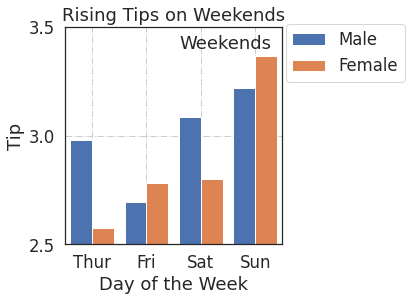

In [ ]:

# Import seaborn
import seaborn as sns
import matplotlib. pyplot as plt
sns.set_theme(font_scale = 1.5)
sns.set_style(style="white")


# Load an example dataset
tips = sns.load_dataset("tips")


# Create a visualization
fig1 = sns.barplot(x="day", y="tip", hue="sex", data=tips, ci= False, saturation = 1)

# Using the set_xlabel to change
fig1.set_xlabel('Day of the Week')
fig1.set_ylabel('Tip')
fig1.set_yticks([0.5,1, 1.5,2,2.5,3,3.5])
fig1.set_ylim(2.5,3.5)
fig1.set_aspect(4)
fig1.legend(bbox_to_anchor=(1.6, 1.05))
fig1.set_title("Rising Tips on Weekends")
fig1.text(1.6,3.4,"Weekends")
fig1.grid(True, linestyle='-.')

plt.show(fig1)

## Saving a Figure

To store da final figure, make surhe to really get the figure.

Most of the time, You can just call

```
fig.savefig("<filename>.pdf")
```

to save the figure. However, this gives an error in the following example, as the figure we crated is not really a figure, but a subplot object.



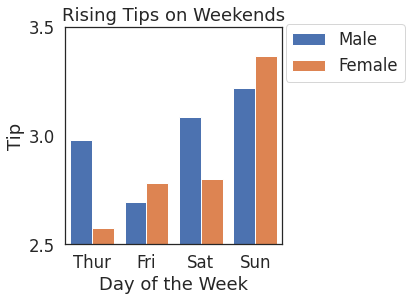

AttributeError: ignored

In [ ]:

# Import seaborn
import seaborn as sns
import matplotlib. pyplot as plt
sns.set_theme(font_scale = 1.5)
sns.set_style(style="white")


# Load an example dataset
tips = sns.load_dataset("tips")


# Create a visualization
fig1 = sns.barplot(x="day", y="tip", hue="sex", data=tips, ci= False, saturation = 1)

# Using the set_xlabel to change
fig1.set_xlabel('Day of the Week')
fig1.set_ylabel('Tip')
fig1.set_yticks([0.5,1, 1.5,2,2.5,3,3.5])
fig1.set_ylim(2.5,3.5)
fig1.set_aspect(4)
fig1.legend(bbox_to_anchor=(1.6, 1.05))
fig1.set_title("Rising Tips on Weekends")

plt.show(fig1)

fig1.savefig("out.png") 

Instead, we first have to acess the figure unsing the ```get_figure()``` function:

In [ ]:
fig = fig1.get_figure()
fig.savefig("out.png") 

Now, the output is stored in Your project folder, where You can download  it.

The [savefig()](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.savefig.html) has different parameters to play with.

Most important is the file format, which You can change by changing the file ending.

For instace, this created a pdf-File with a thight box of white space around it and a transparent background:

In [ ]:
fig.savefig("out.pdf", bbox_inches = "tight", pad_inches = 0.6, transparent = True) 

If you have to save Your figure as a raster-file, make sure to have a high resolution (measured in [Dots per Inch](https://en.wikipedia.org/wiki/Dots_per_inch)).

400 DPI is reasonale for most printing applications:

In [ ]:
fig = fig1.get_figure()
fig.savefig("out.png", dpi = 400) 

# 🏁 Recap

- If you have finished the tasks and have no questions, place the green card on top.
- If you have finished the tasks but would like to discuss the solutions together again, place the yellow card on top.

![](https://www.lokalinfo.ch/fileadmin/news_import/image003_03.jpg)

## ✍️ Case Study: Penguins

- You have a data set of individuals of three different varieties of Penguins
    - Variety
    - Beaks
    - Flippers (wings)
    - Gender

---

### Create two plots that answer the following questions for different context


* **A)** Can You make a distinction between the varieties of Penguins just by looking at the Bill length and depth?
* **B)** How do the weight of males and females differ for the different varieties?

* While plot **A)** will be published in a grey-scale scientific publication plot **B)** is for a print magazine targeted to the general public.

* Save both plots as png-files with the following naming convention:
```"plot_b--huber_j.png"```
* Save them with a resolution of  400 DPI

---

#### Requirements for all plots


- have well defined axis descriptions without underscores
    
---

#### The Scientific plot A

- is grey scale
- shows each single observation
- has a background grid
- has a legend
- is quadratic in format

---

#### The magazine plot B

- has no legend
- uses the MCI colors
- has no background grid and a white background
- has no confidence interval
- has the [golden ratio](https://en.wikipedia.org/wiki/Golden_ratio) 
- has a trimmed y-axis for a more dramatic effect


In [ ]:
penguins = sns.load_dataset("penguins")
penguins

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


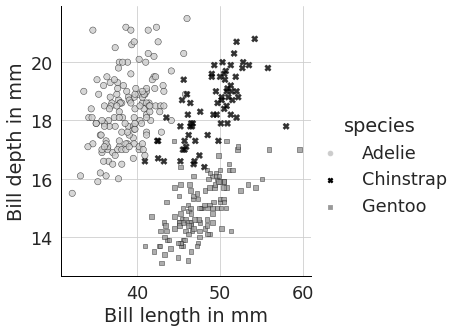

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid',  rc = {'axes.grid' : True, 'axes.edgecolor': '0'}  )

sns.set_context('paper', font_scale=2)



# Create a visualization
fig1 = sns.relplot(
    data=penguins,
    x="bill_length_mm", y="bill_depth_mm",
    hue="species", style="species",
    palette=[ [0.8,0.8,0.8],  [0,0,0], [0.6,0.6,0.6],],
    legend = True,  s=40, edgecolor= "k", alpha = 0.8
)

fig1.set_xlabels("Bill length in mm")
fig1.set_ylabels("Bill depth in mm")


plt.show()

fig1.savefig("plot_a--huber_j.png") 

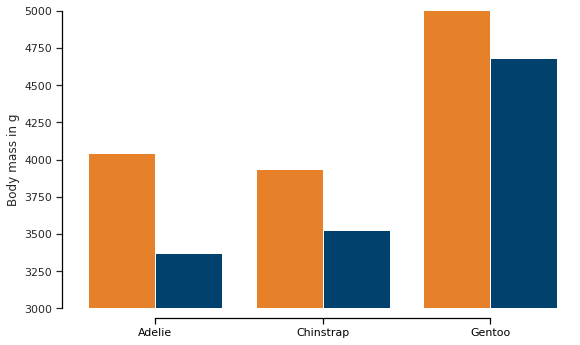

In [ ]:
import seaborn as sns
sns.set_theme(style="whitegrid", rc = {'axes.grid' : False})


sns.set_style('ticks', {'axes.edgecolor': '0',  
                        'xtick.color': '0',
                        'xtick.color': '0'}
              )

penguins = sns.load_dataset("penguins")

# Draw a nested barplot by species and sex
fig2 = sns.catplot(
    data=penguins, kind="bar",
    x="species", y="body_mass_g", hue="sex",
    ci= False, palette=[[230/255,128/255,41/255], [0,65/255,110/255]],
    aspect = 1.618, legend = False, saturation = 1
)

#g.despine(left=True)
fig2.set(ylim = (3000,5000))

fig2.despine(offset=10, trim=True)
fig2.set_axis_labels("", "Body mass in g")

fig2.savefig("plot_b--huber_j.png", dpi = 400) 

## Summary

Plots are not only a valuable tool for communitcating results. Visual data analysis is also a powerful tool to obtain insigths from data in data analytics.

🤓 Here, interactive plots are even more useful. [Plotly](https://plotly.com/python-api-reference/generated/plotly.express.scatter) is a Python libary for interactice plots. As You can see the API is very similar to seaborn, so it will be easy for You to use it, if You want to.

 🤓 **Task**

Test the interactive elements of the plot:
- Hovering over an observation
- Selecting a category in the legend
- Zooming in
- Zooming back out (Double-Click)


In [ ]:
import plotly.express as px
import seaborn as sns

# Load an example dataset
tips = sns.load_dataset("tips")


# Create a visualization
fig = px.scatter(data_frame =tips,
    x="total_bill", y="tip",
    color = "smoker")
fig.show()